In [11]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [12]:
temp=pd.read_csv('Bias_correction.csv')
temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [13]:
df=pd.DataFrame(data=temp)
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [14]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
station             7750 non-null float64
Date                7750 non-null object
Present_Tmax        7682 non-null float64
Present_Tmin        7682 non-null float64
LDAPS_RHmin         7677 non-null float64
LDAPS_RHmax         7677 non-null float64
LDAPS_Tmax_lapse    7677 non-null float64
LDAPS_Tmin_lapse    7677 non-null float64
LDAPS_WS            7677 non-null float64
LDAPS_LH            7677 non-null float64
LDAPS_CC1           7677 non-null float64
LDAPS_CC2           7677 non-null float64
LDAPS_CC3           7677 non-null float64
LDAPS_CC4           7677 non-null float64
LDAPS_PPT1          7677 non-null float64
LDAPS_PPT2          7677 non-null float64
LDAPS_PPT3          7677 non-null float64
LDAPS_PPT4          7677 non-null float64
lat                 7752 non-null float64
lon                 7752 non-null float64
DEM                 7752 non-null float64
Slope       

In [16]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [17]:
import datetime as dt

In [18]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [19]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [20]:
df.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7752.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,735620.062822,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,11829.329540,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,735429.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,735809.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,736191.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,736571.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


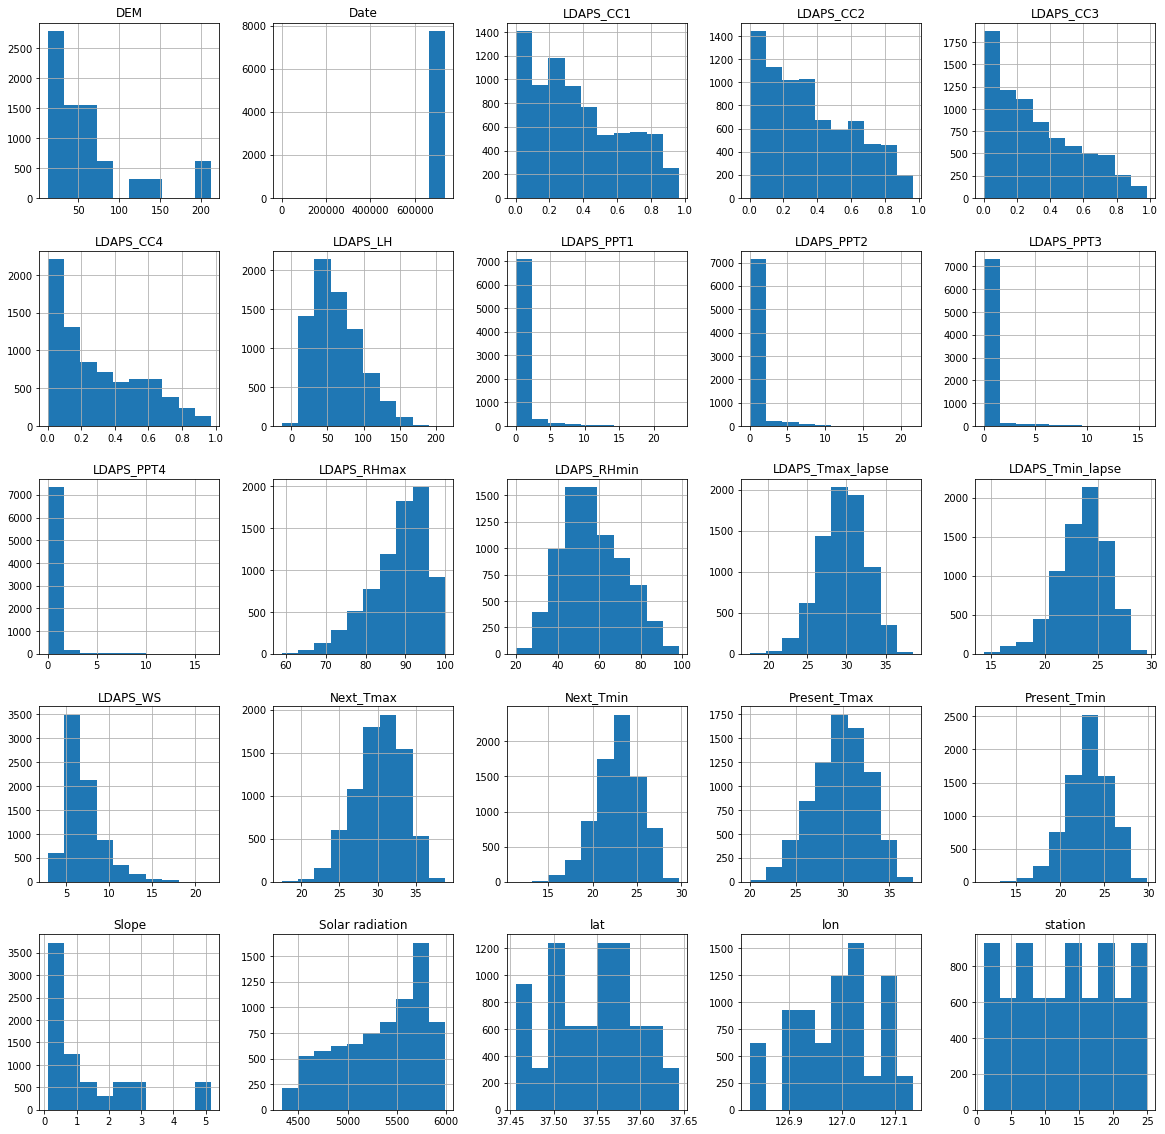

In [21]:
df.hist(figsize=(20,20))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x210260b0908>,
 'caps': [<matplotlib.lines.Line2D at 0x210260ac4c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x210260b0c88>],
 'medians': [<matplotlib.lines.Line2D at 0x210260a4b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x21026b15a88>],
 'means': []}

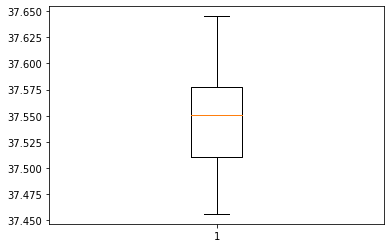

In [22]:
plt.boxplot(df['lat'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21025e18948>,
 'caps': [<matplotlib.lines.Line2D at 0x2102696c708>,
 'boxes': [<matplotlib.lines.Line2D at 0x21025e186c8>],
 'medians': [<matplotlib.lines.Line2D at 0x21025b74e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x21025d77c48>],
 'means': []}

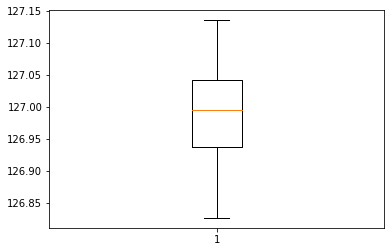

In [23]:
plt.boxplot(df['lon'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce74f028c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce745c1148>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce74f02088>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce744c5448>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce744c5c48>],
 'means': []}

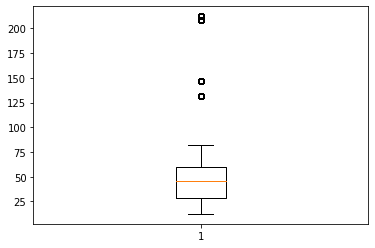

In [14]:
plt.boxplot(df['DEM'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1ce742d1a88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1ce742d1508>,
 'cmins': <matplotlib.collections.LineCollection at 0x1ce745ea988>,
 'cbars': <matplotlib.collections.LineCollection at 0x1ce745eaf88>}

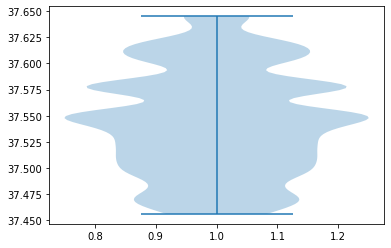

In [15]:
plt.violinplot(df['lat'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1ce7355d908>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1ce74184fc8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1ce74e76e48>,
 'cbars': <matplotlib.collections.LineCollection at 0x1ce73638108>}

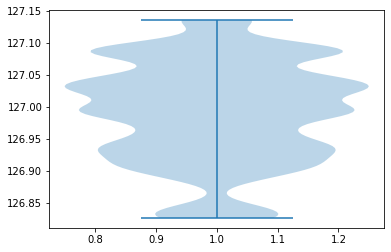

In [16]:
plt.violinplot(df['lon'])

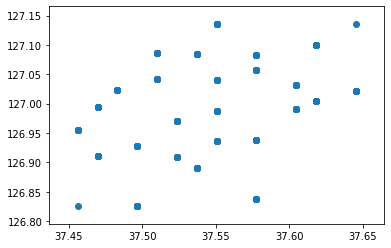

In [17]:
plt.scatter('lat','lon',data=df)

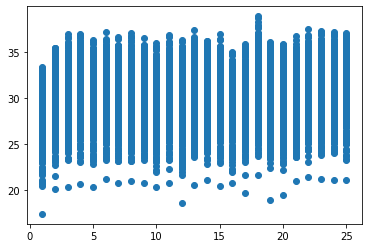

In [18]:
plt.scatter('station','Next_Tmax',data=df)

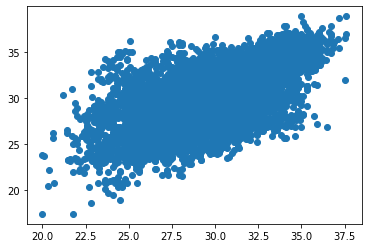

In [19]:
plt.scatter('Present_Tmax','Next_Tmax',data=df)

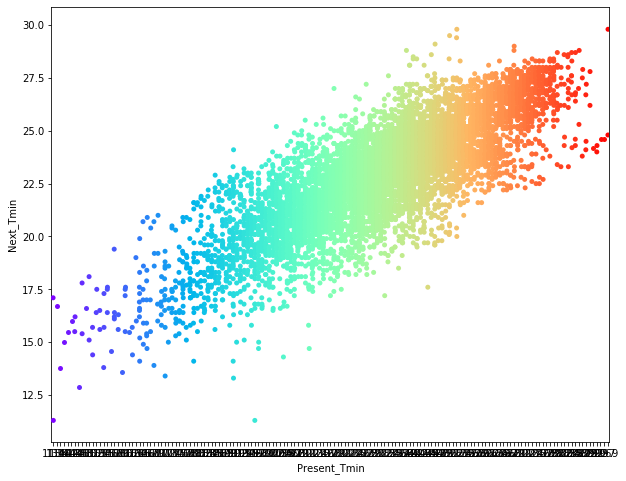

In [20]:
plt.figure(figsize=(10,8))
sns.stripplot('Present_Tmin','Next_Tmin',data=df,palette='rainbow')

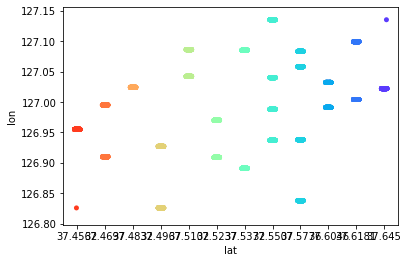

In [21]:
sns.stripplot('lat','lon',data=df,palette='rainbow_r')

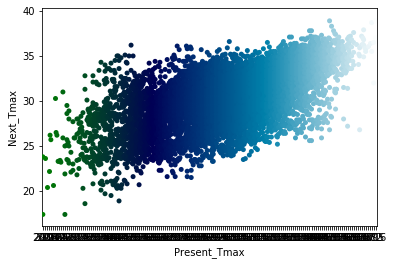

In [22]:
sns.swarmplot('Present_Tmax','Next_Tmax',data=df,palette='ocean')

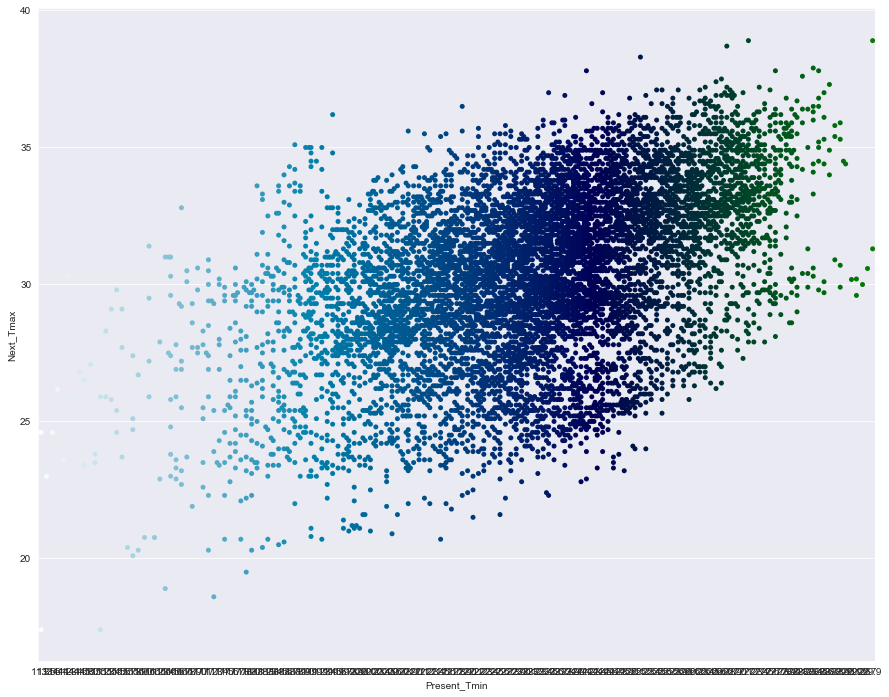

In [24]:
plt.figure(figsize=(15,12))
sns.set_style('darkgrid')
sns.swarmplot('Present_Tmin','Next_Tmax',data=df,palette='ocean_r')

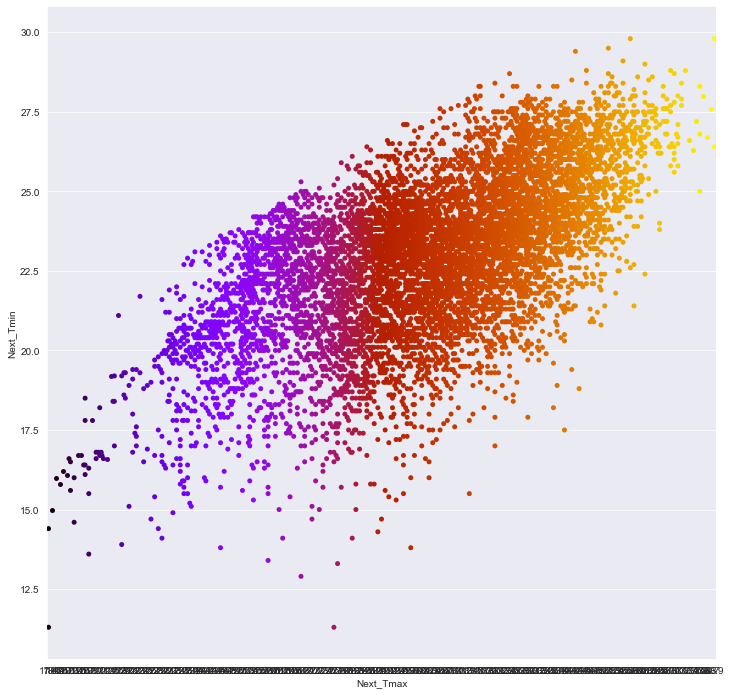

In [26]:
plt.figure(figsize=(12,12))
sns.swarmplot('Next_Tmax','Next_Tmin',data=df,palette='gnuplot')

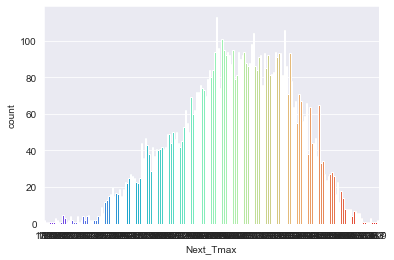

In [29]:
sns.countplot('Next_Tmax',data=df,palette='rainbow')

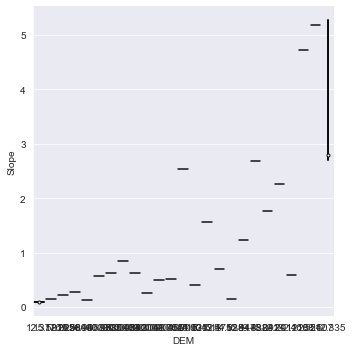

In [31]:
sns.catplot('DEM','Slope',data=df,palette='ocean',kind='violin')

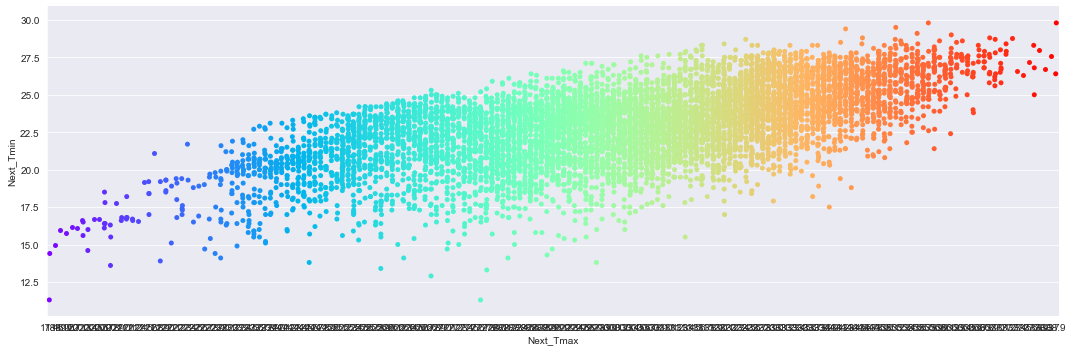

In [33]:
sns.catplot('Next_Tmax','Next_Tmin',data=df,height=5,aspect=3,palette='rainbow',kind='strip')

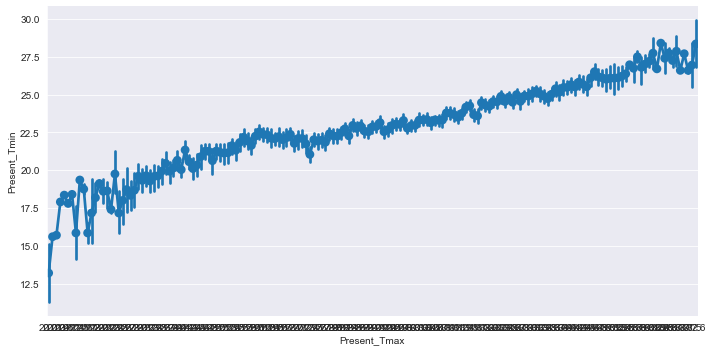

In [37]:
sns.catplot('Present_Tmax','Present_Tmin',data=df,height=5,aspect=2,kind='point')

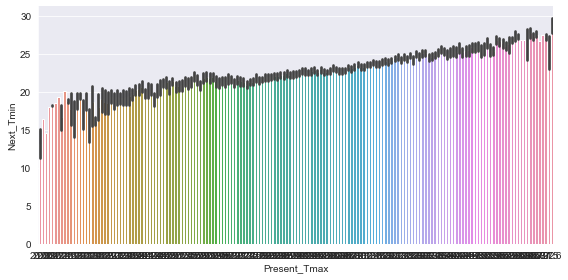

In [38]:
sns.catplot('Present_Tmax','Next_Tmin',data=df,height=4,aspect=2,kind='bar')

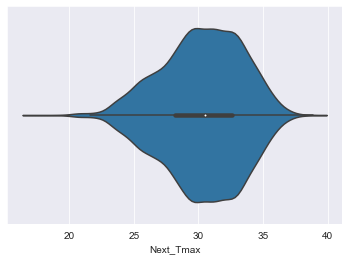

In [40]:
sns.violinplot(df['Next_Tmax'])

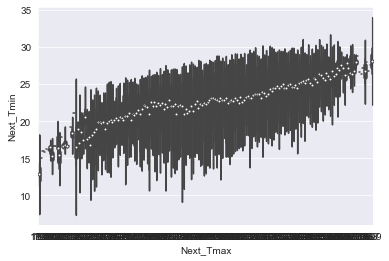

In [41]:
sns.violinplot('Next_Tmax','Next_Tmin',data=df)

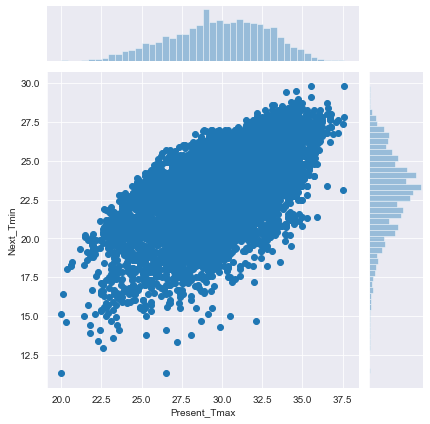

In [45]:
sns.jointplot('Present_Tmax','Next_Tmin',data=df,height=6,ratio=5,space=0.2,kind='scatter')

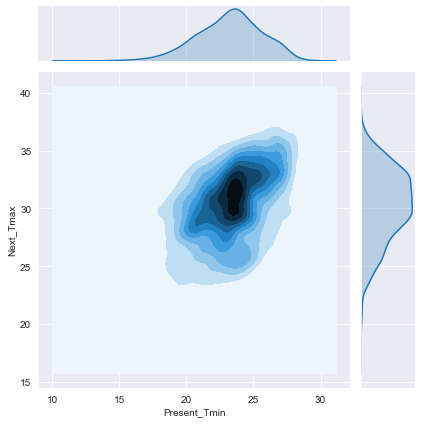

In [46]:
sns.jointplot('Present_Tmin','Next_Tmax',data=df,height=6,ratio=5,space=.2,kind='kde')

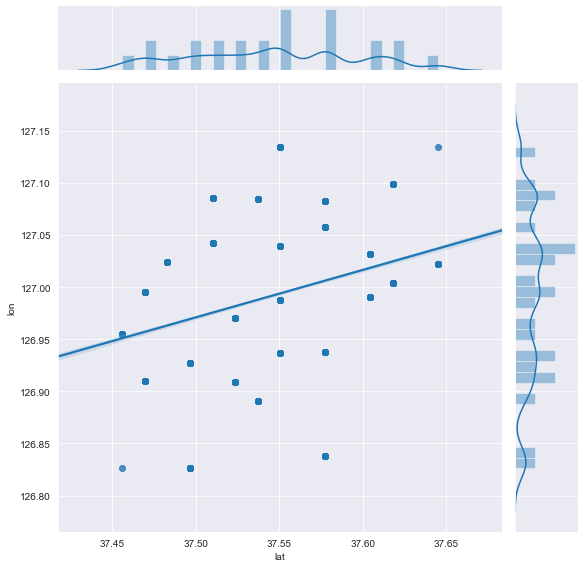

In [48]:
sns.jointplot('lat','lon',data=df,height=8,ratio=6,space=.2,kind='reg')

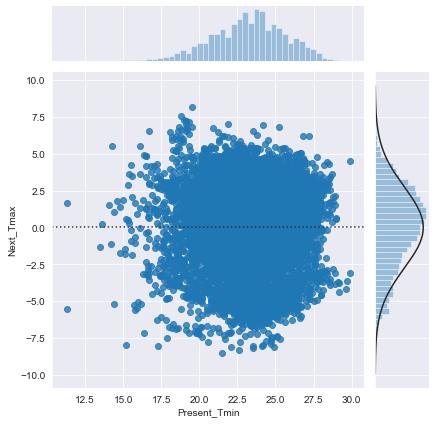

In [49]:
sns.jointplot('Present_Tmin','Next_Tmax',data=df,height=6,ratio=5,space=.2,kind='resid')

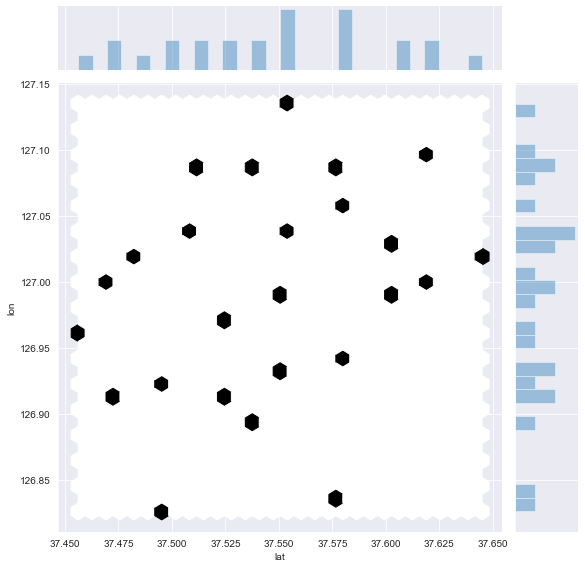

In [50]:
sns.jointplot('lat','lon',data=df,height=8,ratio=6,space=.2,kind='hex')

In [24]:
df.isnull().sum()

station              2
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [25]:
df.shape

(7752, 25)

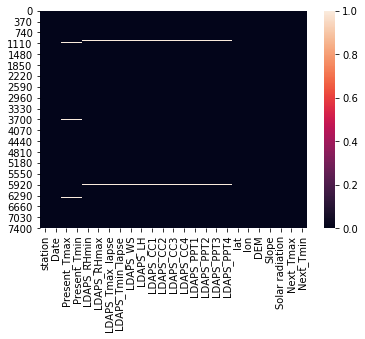

In [26]:
sns.heatmap(df.isnull())

In [27]:
df.dropna(axis=0,how='any',inplace=True)

In [28]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

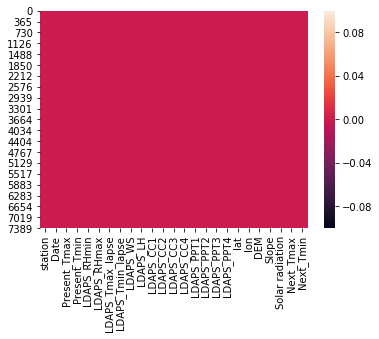

In [29]:
sns.heatmap(df.isnull())

In [30]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

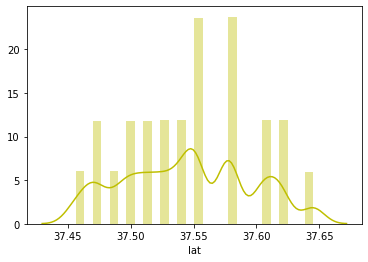

In [31]:
sns.distplot(df['lat'],color='y')

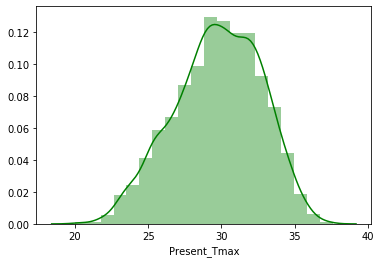

In [32]:
sns.distplot(df['Present_Tmax'],bins=20,color='g')

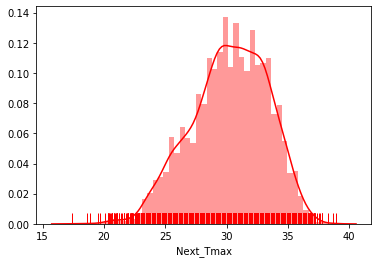

In [33]:
sns.distplot(df['Next_Tmax'],color='r',rug=True)

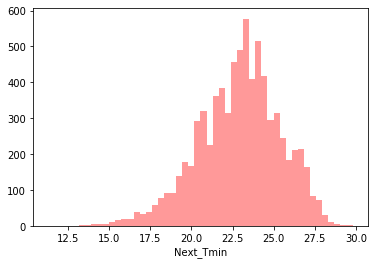

In [34]:
sns.distplot(df['Next_Tmin'],color='r',kde=False)

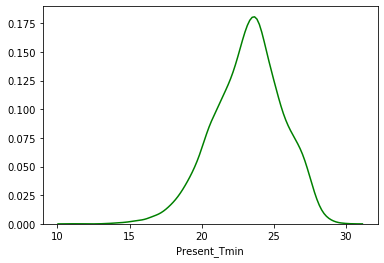

In [35]:
sns.distplot(df['Present_Tmin'],color='g',hist=False)

In [36]:
df.shape

(7588, 25)

In [37]:
df.skew()

station            -0.004178
Date                0.014325
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

station                AxesSubplot(0.125,0.772143;0.0945122x0.107857)
Date                AxesSubplot(0.238415,0.772143;0.0945122x0.107857)
Present_Tmax        AxesSubplot(0.351829,0.772143;0.0945122x0.107857)
Present_Tmin        AxesSubplot(0.465244,0.772143;0.0945122x0.107857)
LDAPS_RHmin         AxesSubplot(0.578659,0.772143;0.0945122x0.107857)
LDAPS_RHmax         AxesSubplot(0.692073,0.772143;0.0945122x0.107857)
LDAPS_Tmax_lapse    AxesSubplot(0.805488,0.772143;0.0945122x0.107857)
LDAPS_Tmin_lapse       AxesSubplot(0.125,0.642714;0.0945122x0.107857)
LDAPS_WS            AxesSubplot(0.238415,0.642714;0.0945122x0.107857)
LDAPS_LH            AxesSubplot(0.351829,0.642714;0.0945122x0.107857)
LDAPS_CC1           AxesSubplot(0.465244,0.642714;0.0945122x0.107857)
LDAPS_CC2           AxesSubplot(0.578659,0.642714;0.0945122x0.107857)
LDAPS_CC3           AxesSubplot(0.692073,0.642714;0.0945122x0.107857)
LDAPS_CC4           AxesSubplot(0.805488,0.642714;0.0945122x0.107857)
LDAPS_PPT1          

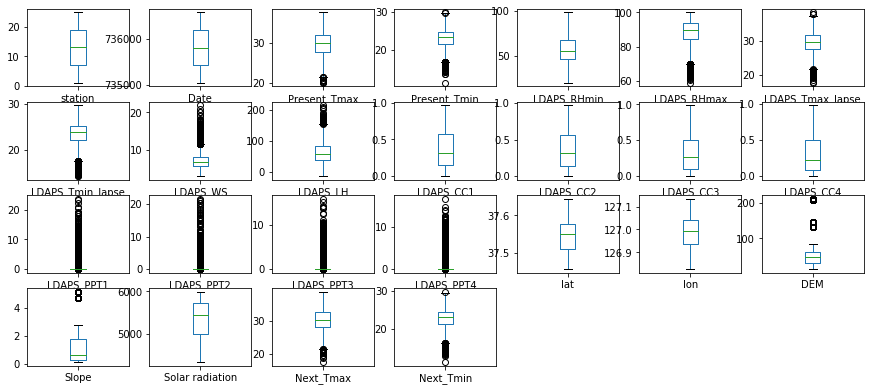

In [38]:
df.plot(kind='box',subplots=True,layout=(6,7),figsize=(15,10))

In [39]:
zscore(df)

array([[-1.66460654, -1.46940984, -0.35331763, ...,  1.51056517,
        -0.36686121, -0.68926525],
       [-1.52605214, -1.46940984,  0.72513836, ...,  1.22299734,
         0.08306779, -0.1655135 ],
       [-1.38749775, -1.46940984,  0.62403311, ...,  1.20960169,
         0.27589451,  0.39852685],
       ...,
       [ 1.38359018,  1.48195442, -2.17321212, ..., -2.09517477,
        -0.6239635 , -1.93821173],
       [ 1.52214457,  1.48195442, -2.17321212, ..., -2.10667071,
        -0.52755014, -1.65619156],
       [ 1.66069897,  1.48195442, -2.20691387, ..., -2.07648676,
        -0.78465243, -2.2202319 ]])

In [40]:
z=np.abs(zscore(df))
print(z)

[[1.66460654 1.46940984 0.35331763 ... 1.51056517 0.36686121 0.68926525]
 [1.52605214 1.46940984 0.72513836 ... 1.22299734 0.08306779 0.1655135 ]
 [1.38749775 1.46940984 0.62403311 ... 1.20960169 0.27589451 0.39852685]
 ...
 [1.38359018 1.48195442 2.17321212 ... 2.09517477 0.6239635  1.93821173]
 [1.52214457 1.48195442 2.17321212 ... 2.10667071 0.52755014 1.65619156]
 [1.66069897 1.48195442 2.20691387 ... 2.07648676 0.78465243 2.2202319 ]]


In [41]:
threshold=3
print(np.where(z<3))
print(df.shape)

(array([   0,    0,    0, ..., 7587, 7587, 7587], dtype=int64), array([ 0,  1,  2, ..., 22, 23, 24], dtype=int64))
(7588, 25)


In [42]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

In [43]:
Q1

station                  7.000000
Date                735429.000000
Present_Tmax            27.800000
Present_Tmin            21.600000
LDAPS_RHmin             45.960243
LDAPS_RHmax             84.203724
LDAPS_Tmax_lapse        27.673756
LDAPS_Tmin_lapse        22.086820
LDAPS_WS                 5.675358
LDAPS_LH                37.206201
LDAPS_CC1                0.146546
LDAPS_CC2                0.140324
LDAPS_CC3                0.100950
LDAPS_CC4                0.081495
LDAPS_PPT1               0.000000
LDAPS_PPT2               0.000000
LDAPS_PPT3               0.000000
LDAPS_PPT4               0.000000
lat                     37.510200
lon                    126.937000
DEM                     28.700000
Slope                    0.271300
Solar radiation       5001.485717
Next_Tmax               28.200000
Next_Tmin               21.300000
Name: 0.25, dtype: float64

In [44]:
Q3

station                 19.000000
Date                736190.000000
Present_Tmax            32.000000
Present_Tmin            24.800000
LDAPS_RHmin             67.115099
LDAPS_RHmax             93.742725
LDAPS_Tmax_lapse        31.711109
LDAPS_Tmin_lapse        25.155660
LDAPS_WS                 8.028960
LDAPS_LH                84.235666
LDAPS_CC1                0.574174
LDAPS_CC2                0.557164
LDAPS_CC3                0.496444
LDAPS_CC4                0.498127
LDAPS_PPT1               0.052594
LDAPS_PPT2               0.017735
LDAPS_PPT3               0.007855
LDAPS_PPT4               0.000017
lat                     37.577600
lon                    127.042000
DEM                     59.832400
Slope                    1.767800
Solar radiation       5729.485840
Next_Tmax               32.600000
Next_Tmin               24.600000
Name: 0.75, dtype: float64

In [45]:
IQR=Q3-Q1
IQR

station              12.000000
Date                761.000000
Present_Tmax          4.200000
Present_Tmin          3.200000
LDAPS_RHmin          21.154856
LDAPS_RHmax           9.539001
LDAPS_Tmax_lapse      4.037353
LDAPS_Tmin_lapse      3.068840
LDAPS_WS              2.353603
LDAPS_LH             47.029465
LDAPS_CC1             0.427627
LDAPS_CC2             0.416839
LDAPS_CC3             0.395495
LDAPS_CC4             0.416632
LDAPS_PPT1            0.052594
LDAPS_PPT2            0.017735
LDAPS_PPT3            0.007855
LDAPS_PPT4            0.000017
lat                   0.067400
lon                   0.105000
DEM                  31.132400
Slope                 1.496500
Solar radiation     728.000123
Next_Tmax             4.400000
Next_Tmin             3.300000
dtype: float64

In [46]:
df_new=df[(z<3).all(axis=1)]

In [47]:
print(df.shape)
print(df_new.shape)

(7588, 25)
(6739, 25)


In [48]:
df=df_new
df.shape

(6739, 25)

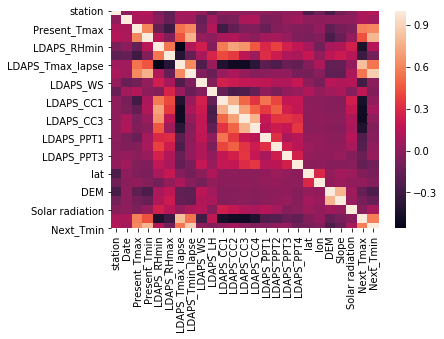

In [49]:
sns.heatmap(df.corr())

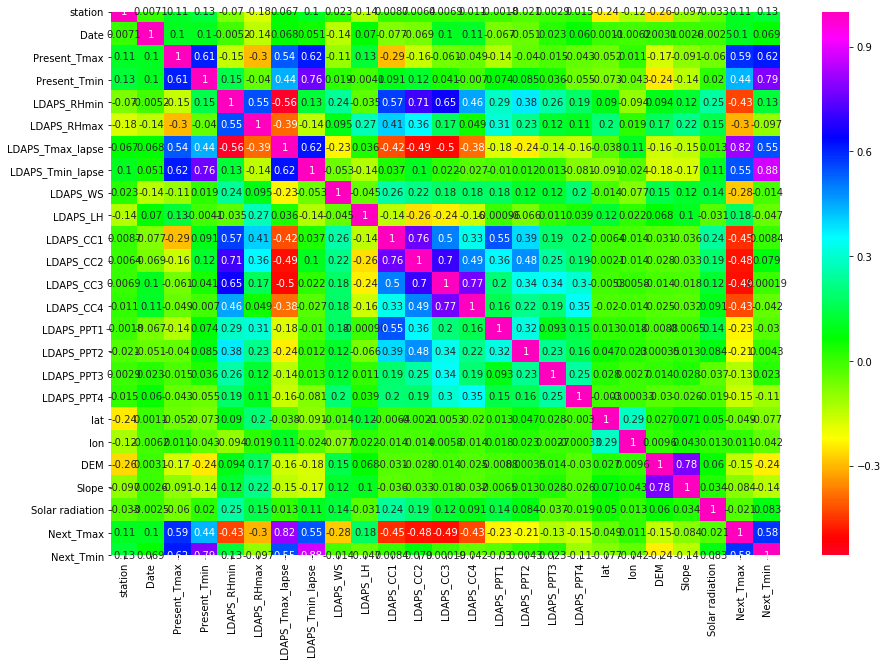

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='gist_rainbow',annot=True)

In [51]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [52]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [53]:
x=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
x.shape

(6739, 23)

In [54]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [55]:
y_max=df['Next_Tmax']
y_max.shape

(6739,)

In [56]:
le=LabelEncoder()
y_max=le.fit_transform(y_max)

In [57]:
y_max

array([73, 87, 93, ..., 65, 68, 60], dtype=int64)

In [58]:
models=[LogisticRegression(),KNeighborsRegressor(),DecisionTreeRegressor(),GaussianNB()]

In [59]:
max_r2_score=0
for r_state in range(40,55):
    x_train,x_test,y_max_train,y_max_test=train_test_split(x,y_max,test_size=.24,random_state=r_state)
    for m in models:
        m.fit(x_train,y_max_train)
        m.score(x_train,y_max_train)
        predm=m.predict(x_test)
        r2_value=r2_score(y_max_test,predm)
        print('R2 score correspond to random state',r_state ,'is',r2_value)
        if r2_value>max_r2_score:
            max_r2_score=r2_value
            final_state=r_state
            final_model=m
print()
print()
print()
print('ma r2 score correspond to random state',final_state,'is',max_r2_score,'and model_reg is',final_model)

R2 score correspond to random state 40 is 0.5710299336826693
R2 score correspond to random state 40 is 0.8363069844267339
R2 score correspond to random state 40 is 0.7554162533969659
R2 score correspond to random state 40 is 0.11234759040143372
R2 score correspond to random state 41 is 0.5937331955892282
R2 score correspond to random state 41 is 0.8415247575902391
R2 score correspond to random state 41 is 0.7904482092702815
R2 score correspond to random state 41 is -0.014641134519173926
R2 score correspond to random state 42 is 0.5947248827427554
R2 score correspond to random state 42 is 0.8268782561527412
R2 score correspond to random state 42 is 0.7747568191551972
R2 score correspond to random state 42 is 0.004242466162326708
R2 score correspond to random state 43 is 0.5969664306488324
R2 score correspond to random state 43 is 0.8480156007559196
R2 score correspond to random state 43 is 0.7506859903641052
R2 score correspond to random state 43 is 0.12260471101907744
R2 score correspo

In [60]:
x_train,x_test,y_max_train,y_max_test=train_test_split(x,y_max,test_size=.24,random_state=47)

In [61]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_max_train)
knr.score(x_train,y_max_train)
predknr=knr.predict(x_test)
print('R2 Score:',r2_score(y_max_test,predknr))
print(mean_squared_error(y_max_test,predknr))
print(mean_absolute_error(y_max_test,predknr))
print(np.sqrt(mean_absolute_error(y_max_test,predknr)))

R2 Score: 0.8543915429072264
124.8122126081582
8.331520395550061
2.886437318832692


In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
parameter={'algorithm':('auto','ball_tree','kd_tree','brute'),'n_neighbors':range(5,10)}
grid=GridSearchCV(knr,param_grid=parameter)
grid.fit(x_train,y_max_train)
print(grid)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': range(5, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
{'algorithm': 'auto', 'n_neighbors': 6}


In [64]:
knr=KNeighborsRegressor(algorithm='auto',n_neighbors=6)
knr.fit(x_train,y_max_train)
knr.score(x_train,y_max_train)
predknr=knr.predict(x_test)
print('R2 Score:',r2_score(y_max_test,predknr))
print(mean_squared_error(y_max_test,predknr))
print(mean_absolute_error(y_max_test,predknr))
print(np.sqrt(mean_absolute_error(y_max_test,predknr)))

R2 Score: 0.8540727444108605
125.08547932976239
8.36351462711166
2.8919741746965273


In [66]:
score=cross_val_score(knr,x,y_max,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.56292492 0.41095388 0.53163416 0.55148118 0.47400561]
0.5061999499872
0.05660971904675001


In [67]:
y_min=df['Next_Tmin']
y_min.shape

(6739,)

In [68]:
y_min

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 6739, dtype: float64

In [69]:
y_min=le.fit_transform(y_min)
y_min

array([56, 69, 83, ..., 25, 32, 18], dtype=int64)

In [71]:
max_r2_score=0
for r_state in range(40,55):
    x_train,x_test,y_min_train,y_min_test=train_test_split(x,y_min,test_size=.24,random_state=r_state)
    for m in models:
        m.fit(x_train,y_min_train)
        m.score(x_train,y_min_train)
        predm=m.predict(x_test)
        r2_value=r2_score(y_min_test,predm)
        print('R2 score correspond to random state',r_state ,'is',r2_value)
        if r2_value>max_r2_score:
            max_r2_score=r2_value
            final_state=r_state
            final_model=m
print()
print()
print()
print('Maximum r2 score correspond to random state',final_state,'is',max_r2_score,'and model_reg is',final_model)

R2 score correspond to random state 40 is 0.6431436278387158
R2 score correspond to random state 40 is 0.8681537883498884
R2 score correspond to random state 40 is 0.7733080982363769
R2 score correspond to random state 40 is -0.15603991828854902
R2 score correspond to random state 41 is 0.650727833898382
R2 score correspond to random state 41 is 0.8653293819711796
R2 score correspond to random state 41 is 0.7787389003925356
R2 score correspond to random state 41 is -0.4464676880682794
R2 score correspond to random state 42 is 0.6272693525014794
R2 score correspond to random state 42 is 0.8661369396023676
R2 score correspond to random state 42 is 0.754997858026662
R2 score correspond to random state 42 is -0.773116438082204
R2 score correspond to random state 43 is 0.6642214900211358
R2 score correspond to random state 43 is 0.8701768353522087
R2 score correspond to random state 43 is 0.7932710120162265
R2 score correspond to random state 43 is -0.4248878319053746
R2 score correspond to

In [72]:
x_train,x_test,y_min_train,y_min_test=train_test_split(x,y_min,test_size=.24,random_state=43)

In [73]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_min_train)
knr.score(x_train,y_min_train)
predknr=knr.predict(x_test)
print('R2 Score:',r2_score(y_min_test,predknr))
print(mean_squared_error(y_min_test,predknr))
print(mean_absolute_error(y_min_test,predknr))
print(np.sqrt(mean_absolute_error(y_min_test,predknr)))

R2 Score: 0.8701768353522087
73.31265760197775
6.5336217552534
2.556095020779431


In [74]:
grid=GridSearchCV(knr,param_grid=parameter)
grid.fit(x_train,y_min_train)
print(grid)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': range(5, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
{'algorithm': 'auto', 'n_neighbors': 5}


In [101]:
knr=KNeighborsRegressor(algorithm='auto',n_neighbors=5)
knr.fit(x_train,y_min_train)
knr.score(x_train,y_min_train)
predknr=knr.predict(x_test)
print('R2 Score:',r2_score(y_min_test,predknr))
print(mean_squared_error(y_min_test,predknr))
print(mean_absolute_error(y_min_test,predknr))
print(np.sqrt(mean_absolute_error(y_min_test,predknr)))

R2 Score: 0.8701768353522087
73.31265760197775
6.5336217552534
2.556095020779431


In [75]:
score=cross_val_score(knr,x,y_min,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.46538964 0.49430735 0.65705148 0.70855771 0.7411927 ]
0.6132997760200143
0.11258906755765907


In [76]:
from sklearn.externals import joblib

In [77]:
joblib.dump(knr,'TeperatureFile.obj')

['TeperatureFile.obj']